### Student Information
Name: 傅珀瑩

Student ID: 1061066S

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

## 1. Data source

#### Citation Request: 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015 

According to the ["Data Set Information"](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences): 

* Score is either 1 (for positive) or 0 (for negative) 

* The sentences come from three different websites/fields:
    * imdb.com
    * amazon.com
    * yelp.com

* For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.

* We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected. 

In [2]:
import csv

file_amazon = '~/learn_CS/2017_Fall_Data_Mining/data_mining_hw_1/sentiment labelled sentences/amazon_cells_labelled.txt'
file_imbd = '~/learn_CS/2017_Fall_Data_Mining/data_mining_hw_1/sentiment labelled sentences/imdb_labelled.txt'
file_yelp = '~/learn_CS/2017_Fall_Data_Mining/data_mining_hw_1/sentiment labelled sentences/yelp_labelled.txt'

amazon = pd.read_table(file_amazon, names = ['sentence', 'label'])
imbd = pd.read_csv(file_imbd, quoting=csv.QUOTE_NONE, names = ['sentence', 'label'], sep = '\t', error_bad_lines=False)
yelp = pd.read_table(file_yelp, names = ['sentence', 'label'])

# take a look from data:
print("\namazon data is like...\n", amazon[:5])
print("\nimbd data is like...\n", imbd[:5])
print("\nyelp data is like...\n", yelp[:5])


amazon data is like...
                                             sentence  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1

imbd data is like...
                                             sentence  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

yelp data is like...
                                             sentence  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the 

## 2. Data Preparation

Explore and familiarizing myself with data!

* data type
* data length
* check 500 positive & 500 negative sentence
* get specific column
* add label name

In [3]:
# data type:
print('object type of amazon = ', type(amazon))
print('object type of imbd = ', type(imbd))
print('object type of yelp = ', type(yelp))

# data length:
print('\nlen(amazon) = ', len(amazon))
print('len(imbd) = ', len(imbd))
print('len(yelp) = ', len(yelp))

print('\nlen(amazon.sentence) = ', len(amazon.sentence))
print('len(imbd.sentence) = ', len(imbd.sentence))
print('len(yelp.sentence) = ', len(yelp.sentence))

# check 500 positive & 500 negative sentence:
print("\nlength of amazon.query('label == 1') : ", len(amazon.query('label == 1')))
print("length of amazon.query('label == 0') : ", len(amazon.query('label == 0')))

print("\nlength of imbd.query('label == 1') : ", len(imbd.query('label == 1')))
print("length of imbd.query('label == 0') : ", len(imbd.query('label == 0')))

print("\nlength of yelp.query('label == 1') : ", len(yelp.query('label == 1')))
print("length of yelp.query('label == 0') : ", len(yelp.query('label == 0')))


# get sentence column:
print('\n','----------------'*5)
print("\nThe sentence column of amazon data is like...\n", amazon[:5].sentence)
print("\nThe sentence column of imbd data is like...\n", imbd[:5].sentence)
print("\nThe sentence column of yelp data is like...\n", yelp[:5].sentence)

object type of amazon =  <class 'pandas.core.frame.DataFrame'>
object type of imbd =  <class 'pandas.core.frame.DataFrame'>
object type of yelp =  <class 'pandas.core.frame.DataFrame'>

len(amazon) =  1000
len(imbd) =  1000
len(yelp) =  1000

len(amazon.sentence) =  1000
len(imbd.sentence) =  1000
len(yelp.sentence) =  1000

length of amazon.query('label == 1') :  500
length of amazon.query('label == 0') :  500

length of imbd.query('label == 1') :  500
length of imbd.query('label == 0') :  500

length of yelp.query('label == 1') :  500
length of yelp.query('label == 0') :  500

 --------------------------------------------------------------------------------

The sentence column of amazon data is like...
 0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: sen

In [3]:
# add label name:
amazon['label_name'] = amazon.label.apply(lambda t: dmh.format_labels(t))
print('\namazon now is ...\n', amazon)

imbd['label_name'] = imbd.label.apply(lambda t: dmh.format_labels(t))
print('\nimbd now is ...\n', imbd)

yelp['label_name'] = yelp.label.apply(lambda t: dmh.format_labels(t))
print('\nyelp now is ...\n', yelp)


amazon now is ...
                                               sentence  label label_name
0    So there is no way for me to plug it in here i...      0   negative
1                          Good case, Excellent value.      1   positive
2                               Great for the jawbone.      1   positive
3    Tied to charger for conversations lasting more...      0   negative
4                                    The mic is great.      1   positive
5    I have to jiggle the plug to get it to line up...      0   negative
6    If you have several dozen or several hundred c...      0   negative
7          If you are Razr owner...you must have this!      1   positive
8                  Needless to say, I wasted my money.      0   negative
9                     What a waste of money and time!.      0   negative
10                     And the sound quality is great.      1   positive
11   He was very impressed when going from the orig...      1   positive
12   If the two were seperated 

In [8]:
# first 10 rows:
print('\n amazon[0:10] = \n', amazon[0:10])
print('\n imbd[0:10] = \n', imbd[0:10])
print('\n yelp[0:10] = \n', yelp[0:10])

# last 10 rows:
print('\n amazon[-11:-1] = \n', amazon[-11:-1])
print('\n imbd[-11:-1] = \n', imbd[-11:-1])
print('\n yelp[-11:-1] = \n', yelp[-11:-1])

print('\n amazon.tail(n=10) = \n', amazon.tail(n=10))
print('\n imbd.tail(n=10) = \n', imbd.tail(n=10))
print('\n yelp.tail(n=10) = \n', yelp.tail(n=10))

### use iloc to get every 10 row:
print('\n amazon.iloc[::10][0:10] = ', amazon.iloc[::10][0:10])
print('\n imbd.iloc[::10][0:10] = ', imbd.iloc[::10][0:10])
print('\n yelp.iloc[::10][0:10] = ', yelp.iloc[::10][0:10])


 amazon[0:10] = 
                                             sentence  label label_name
0  So there is no way for me to plug it in here i...      0   negative
1                        Good case, Excellent value.      1   positive
2                             Great for the jawbone.      1   positive
3  Tied to charger for conversations lasting more...      0   negative
4                                  The mic is great.      1   positive
5  I have to jiggle the plug to get it to line up...      0   negative
6  If you have several dozen or several hundred c...      0   negative
7        If you are Razr owner...you must have this!      1   positive
8                Needless to say, I wasted my money.      0   negative
9                   What a waste of money and time!.      0   negative

 imbd[0:10] = 
                                             sentence  label label_name
0  A very, very, very slow-moving, aimless movie ...      0   negative
1  Not sure who was more lost - the flat 

## 4. Data Mining using Pandas

#### 4.1 Missing Values


In [16]:
# check missing values:
print('\nChecking for amazon...\n', amazon.isnull().apply(lambda x: dmh.check_missing_values(x)), '\n')
print('\nBefor append : ', amazon[:3])
print('\nChecking for imbd...\n', imbd.isnull().apply(lambda x: dmh.check_missing_values(x)), '\n')
print('\nChecking for yelp...\n', yelp.isnull().apply(lambda x: dmh.check_missing_values(x)), '\n')

# ADD MISSING ERCORD:
dummy_dict = [{'sentence': 'dummy text'}]
amazon = amazon.append(dummy_dict, ignore_index=True)
print('\nAfter append label turn into float : ', amazon[:3])
print('\nChecking for amazon (add one missing records) ...\n', amazon.isnull().apply(lambda x: dmh.check_missing_values(x)), '\n')

# drop missing record:
amazon.dropna(inplace=True)
amazon.label = amazon.label.astype(int)
print('\nChecking for amazon (drop missing records) ...\n', amazon.isnull().apply(lambda x: dmh.check_missing_values(x)), '\n')
print('\nAfter recovery type of label "amazon.label.astype(int)" : ', amazon[:3])


Checking for amazon...
 sentence      (The amoung of missing records is: , 0)
label         (The amoung of missing records is: , 0)
label_name    (The amoung of missing records is: , 0)
dtype: object 


Befor append :                                              sentence  label label_name
0  So there is no way for me to plug it in here i...      0   negative
1                        Good case, Excellent value.      1   positive
2                             Great for the jawbone.      1   positive

Checking for imbd...
 sentence      (The amoung of missing records is: , 0)
label         (The amoung of missing records is: , 0)
label_name    (The amoung of missing records is: , 0)
dtype: object 


Checking for yelp...
 sentence      (The amoung of missing records is: , 0)
label         (The amoung of missing records is: , 0)
label_name    (The amoung of missing records is: , 0)
dtype: object 


After append label turn into float :                                              sentence  l

#### 4.2 Dealing with Duplicate Data

In [6]:
### check for duplicated: (list all)
amazon.duplicated()
# imbd.duplicated()
# yelp.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [17]:
# use sum to verify how many true:
print('Duplicated number of amazon = ', sum(amazon.duplicated('sentence')))
print('Duplicated number of imbd = ', sum(imbd.duplicated('sentence')))
print('Duplicated number of yelp = ', sum(yelp.duplicated('sentence')))

Duplicated number of amazon =  10
Duplicated number of imbd =  3
Duplicated number of yelp =  4


##### Exercise 1: 
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

changing to check for duplicate data...(below)

In [18]:
##### find duplicated data place and data sentence:

### amazon
order_list_amazon = []
order_list_amazon.append(amazon.duplicated().apply(lambda x: dmh.get_duplicated_place(x)))

for i in range(0, len(order_list_amazon[0])):
    if order_list_amazon[0][i] == True:
        print('\nOrder_list_amazon[0][', i, '] = ', order_list_amazon[0][i])
        print('Order_list_amazon[', i, '] = \n', amazon[i:i+1])

# use sum to verify how many true:
print('\n=> Duplicated number of amazon = ', sum(amazon.duplicated('sentence')))
print('\n', '-----------------------'*3, '\n')

### imbd
order_list_imbd = []
order_list_imbd.append(imbd.duplicated().apply(lambda x: dmh.get_duplicated_place(x)))

for i in range(0, len(order_list_imbd[0])):
    if order_list_imbd[0][i] == True:
        print('\nOrder_list_imbd[0][', i, '] = ', order_list_imbd[0][i])
        print('Order_list_imbd[', i, '] = \n', imbd[i:i+1])

# use sum to verify how many true:
print('\n=> Duplicated number of imbd = ', sum(imbd.duplicated('sentence')))
print('\n', '-----------------------'*3, '\n')

### yelp
order_list_yelp = []
order_list_yelp.append(yelp.duplicated().apply(lambda x: dmh.get_duplicated_place(x)))

for i in range(0, len(order_list_yelp[0])):
    if order_list_yelp[0][i] == True:
        print('\nOrder_list_yelp[0][', i, '] = ', order_list_yelp[0][i])
        print('Order_list_yelp[', i, '] = \n', yelp[i:i+1])

# use sum to verify how many true:
print('\n=> Duplicated number of yelp = ', sum(yelp.duplicated('sentence')))


Order_list_amazon[0][ 285 ] =  1
Order_list_amazon[ 285 ] = 
           sentence  label label_name
285  Great phone!.      1   positive

Order_list_amazon[0][ 407 ] =  1
Order_list_amazon[ 407 ] = 
          sentence  label label_name
407  Works great.      1   positive

Order_list_amazon[0][ 524 ] =  1
Order_list_amazon[ 524 ] = 
           sentence  label label_name
524  Works great!.      1   positive

Order_list_amazon[0][ 543 ] =  1
Order_list_amazon[ 543 ] = 
                     sentence  label label_name
543  Don't buy this product.      0   negative

Order_list_amazon[0][ 744 ] =  1
Order_list_amazon[ 744 ] = 
                                               sentence  label label_name
744  If you like a loud buzzing to override all you...      0   negative

Order_list_amazon[0][ 748 ] =  1
Order_list_amazon[ 748 ] = 
           sentence  label label_name
748  Does not fit.      0   negative

Order_list_amazon[0][ 778 ] =  1
Order_list_amazon[ 778 ] = 
                   sentenc

In [19]:
### To find duplicates by index value:

dupl_index_info = amazon.index.duplicated()
print('length of array = ', len(dupl_index_info))
print('dupl_index_info[:10] = ', dupl_index_info[:10])

# dupl_index_info_first = amazon.index.duplicated(keep='first')
# print('length of array = ', len(dupl_index_info_first))

# dupl_index_info_last = amazon.index.duplicated(keep='last')
# print('length of array = ', len(dupl_index_info_last))

## List of columns to identify duplications:
# print(amazon[~amazon.index.duplicated()])
# print(amazon[~amazon.index.duplicated(keep='first')])

## use column name to get column:
# amazon.get('label')

## uesing select function:
# amazon.select(lambda x: x == 'label', axis=1)

length of array =  1000
dupl_index_info[:10] =  [False False False False False False False False False False]


In [4]:
# drop duplicated data: 
print('\nBefor drop, len(amazon) = ', len(amazon))
amazon.drop_duplicates(keep='first', inplace=True)
print('After drop, len(amazon) = ', len(amazon))

print('\nBefor drop, len(imbd) = ', len(imbd))
imbd.drop_duplicates(keep='first', inplace=True)
print('After drop, len(imbd) = ', len(imbd))

print('\nBefor drop, len(yelp) = ', len(yelp))
yelp.drop_duplicates(keep='first', inplace=True)
print('After drop, len(yelp) = ', len(yelp))


Befor drop, len(amazon) =  1000
After drop, len(amazon) =  990

Befor drop, len(imbd) =  1000
After drop, len(imbd) =  997

Befor drop, len(yelp) =  1000
After drop, len(yelp) =  996


### 5. Data Preprocessing

    1. Sampling
    2. Feature Creation
    3. Feature Subset Selection
    
    4. Dimensionality Reduction
    5. Aggregation
    6. Discretization and Binarization
    7. Attribute Transformation


### 1. Sampling:

In [5]:
amazon_sample = amazon.sample(n=500)
print('\n len(amazon_sample) = ', len(amazon_sample), ', amazon_sample[0:3] = \n', amazon_sample[0:3])

imbd_sample = imbd.sample(n=500)
print('\n len(imbd_sample) = ', len(imbd_sample), ', imbd_sample[0:3] = \n', imbd_sample[0:3])

yelp_sample = yelp.sample(n=500)
print('\n len(yelp_sample) = ', len(yelp_sample), ', yelp_sample[0:3] = \n', yelp_sample[0:3])



 len(amazon_sample) =  500 , amazon_sample[0:3] = 
                                               sentence  label label_name
229  I ordered this for sony Ericsson W810i but I t...      0   negative
99             I'm very disappointed with my decision.      0   negative
348  This little device has transformed my organiza...      1   positive

 len(imbd_sample) =  500 , imbd_sample[0:3] = 
                                               sentence  label label_name
238                                 The poor actors.        0   negative
578  With the originality and freshness of the firs...      0   negative
423  Now we were chosen to be tortured with this di...      0   negative

 len(yelp_sample) =  500 , yelp_sample[0:3] = 
                                               sentence  label label_name
477  The steaks are all well trimmed and also perfe...      1   positive
756  I had to wait over 30 minutes to get my drink ...      0   negative
737  Try them in the airport to experience som

In [6]:
## amazon
# cheack lable distribution:
amazon_lable_counts = ta.get_type_and_frequency(list(amazon.label))
print('\namazon.lable distribution: ', amazon_lable_counts)
# check positive or negative sentence:
print("length of amazon.query('label == 0') : ", len(amazon.query('label == 0')))
print("length of amazon.query('label == 1') : ", len(amazon.query('label == 1')))

amazon_sample_lable_counts = ta.get_type_and_frequency(list(amazon_sample.label))
print('\namazon_sample.lable distribution: ', amazon_sample_lable_counts)
print("length of amazon_sample.query('label == 0') : ", len(amazon_sample.query('label == 0')))
print("length of amazon_sample.query('label == 1') : ", len(amazon_sample.query('label == 1')))

print("------"*12)

## imbd
imbd_lable_counts = ta.get_type_and_frequency(list(imbd.label))
print('\nimbd.lable distribution: ', imbd_lable_counts)
print("length of imbd.query('label == 0') : ", len(imbd.query('label == 0')))
print("length of imbd.query('label == 1') : ", len(imbd.query('label == 1')))

imbd_sample_lable_counts = ta.get_type_and_frequency(list(imbd_sample.label))
print('\nimbd_sample.lable distribution: ', imbd_sample_lable_counts)
print("length of imbd_sample.query('label == 0') : ", len(imbd_sample.query('label == 0')))
print("length of imbd_sample.query('label == 1') : ", len(imbd_sample.query('label == 1')))

print("------"*12)

## yelp

yelp_lable_counts = ta.get_type_and_frequency(list(yelp.label))
print('\nyelp.lable distribution: ', yelp_lable_counts)
print("length of yelp.query('label == 0') : ", len(yelp.query('label == 0')))
print("length of yelp.query('label == 1') : ", len(yelp.query('label == 1')))

yelp_sample_lable_counts = ta.get_type_and_frequency(list(yelp_sample.label))
print('\nyelp_sample.lable distribution: ', yelp_sample_lable_counts)
print("length of yelp_sample.query('label == 0') : ", len(yelp_sample.query('label == 0')))
print("length of yelp_sample.query('label == 1') : ", len(yelp_sample.query('label == 1')))



amazon.lable distribution:  OrderedDict([(0, 497), (1, 493)])
length of amazon.query('label == 0') :  497
length of amazon.query('label == 1') :  493

amazon_sample.lable distribution:  OrderedDict([(0, 253), (1, 247)])
length of amazon_sample.query('label == 0') :  253
length of amazon_sample.query('label == 1') :  247
------------------------------------------------------------------------

imbd.lable distribution:  OrderedDict([(0, 499), (1, 498)])
length of imbd.query('label == 0') :  499
length of imbd.query('label == 1') :  498

imbd_sample.lable distribution:  OrderedDict([(1, 253), (0, 247)])
length of imbd_sample.query('label == 0') :  247
length of imbd_sample.query('label == 1') :  253
------------------------------------------------------------------------

yelp.lable distribution:  OrderedDict([(1, 499), (0, 497)])
length of yelp.query('label == 0') :  497
length of yelp.query('label == 1') :  499

yelp_sample.lable distribution:  OrderedDict([(0, 251), (1, 249)])
length 

In [23]:
amazon_lable_count = ta.get_tokens_and_frequency(list(amazon.label))
amazon_sample_lable_count = ta.get_tokens_and_frequency(list(amazon_sample.label))

imbd_lable_count = ta.get_tokens_and_frequency(list(imbd.label))
imbd_sample_lable_count = ta.get_tokens_and_frequency(list(imbd_sample.label))

yelp_lable_count = ta.get_tokens_and_frequency(list(yelp.label))
yelp_sample_lable_count = ta.get_tokens_and_frequency(list(yelp_sample.label))


## check distribution:

py.iplot(ta.plot_word_frequency(amazon_lable_count, "Amazon Lable distribution"))
# py.iplot(ta.plot_word_frequency(amazon_sample_lable_count, "Amazon_sample Lable distribution"))

# py.iplot(ta.plot_word_frequency(imbd_lable_count, "imbd Lable distribution"))
# py.iplot(ta.plot_word_frequency(imbd_sample_lable_count, "imbd_sample Lable distribution"))

# py.iplot(ta.plot_word_frequency(yelp_lable_count, "yelp Lable distribution"))
# py.iplot(ta.plot_word_frequency(yelp_sample_lable_count, "yelp_sample Lable distribution"))

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~amberfu2017/0 or inside your plot.ly account where it is named 'plot from API'


##### Exercise 2: 
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.

In [24]:
# plotly of dataset:

import plotly.graph_objs as go

trace1 = go.Bar(
    x=['amazon', 'amazon_sample', 'imbd', 'imbd_sample', 'yelp', 'yelp_sample'],
    y=[amazon_lable_counts[0], amazon_sample_lable_counts[0],
       imbd_lable_counts[0], imbd_sample_lable_counts[0],
       yelp_lable_counts[0], yelp_sample_lable_counts[0]],
    text=["{:.2%}".format(amazon_lable_counts[0]/len(amazon)),
         "{:.2%}".format(amazon_sample_lable_counts[0]/len(amazon_sample)),
         "{:.2%}".format(imbd_lable_counts[0]/len(imbd)),
         "{:.2%}".format(imbd_sample_lable_counts[0]/len(imbd_sample)),
         "{:.2%}".format(yelp_lable_counts[0]/len(yelp)),
         "{:.2%}".format(yelp_sample_lable_counts[0]/len(yelp_sample))],
    name='Negative'
)
trace2 = go.Bar(
    x=['amazon', 'amazon_sample', 'imbd', 'imbd_sample', 'yelp', 'yelp_sample'],
    y=[amazon_lable_counts[1], amazon_sample_lable_counts[1],
       imbd_lable_counts[1], imbd_sample_lable_counts[1],
       yelp_lable_counts[1], yelp_sample_lable_counts[1]],
    text=["{:.2%}".format(amazon_lable_counts[1]/len(amazon)),
         "{:.2%}".format(amazon_sample_lable_counts[1]/len(amazon_sample)),
         "{:.2%}".format(imbd_lable_counts[1]/len(imbd)),
         "{:.2%}".format(imbd_sample_lable_counts[1]/len(imbd_sample)),
         "{:.2%}".format(yelp_lable_counts[1]/len(yelp)),
         "{:.2%}".format(yelp_sample_lable_counts[1]/len(yelp_sample))],
    name='Positive'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


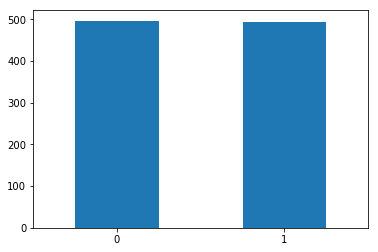

In [25]:
# Using matplotlib library:
amazon.label.value_counts().plot(kind="bar", rot=0)

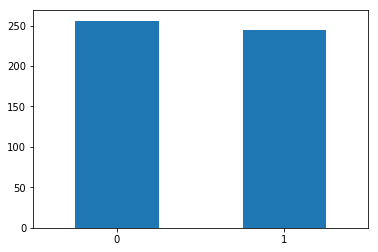

In [26]:
amazon_sample.label.value_counts().plot(kind="bar", rot=0)

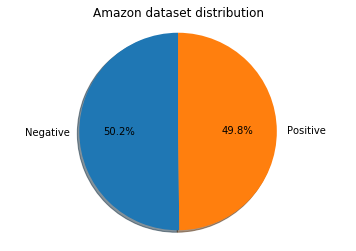

In [27]:
import matplotlib.pyplot as plt

labels = ['Negative', 'Positive']
sizes = [amazon_lable_counts[0], amazon_lable_counts[1]]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Amazon dataset distribution')

plt.show()

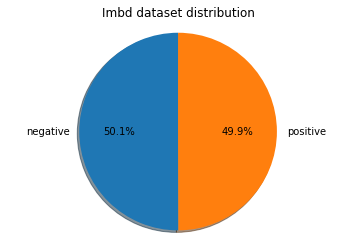

In [28]:
# Use function to 
def dataset_piechar(labels_list, data, title):
    labels = labels_list[0], labels_list[1]
    sizes = [data[labels_list[0]], data[labels_list[1]]]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    return plt.show()

# labels = 'Negative', 'Positive'
# print(labels)
from collections import Counter

labels_list = list(Counter(imbd.label_name).keys())
amazon_lableName_counts = ta.get_type_and_frequency(list(imbd.label_name))
title = 'Imbd dataset distribution'

dataset_piechar(labels_list, amazon_lableName_counts, title)

### 2 .Feature Creation

In [7]:
# text = imbd.sentence[0]
# # type(text)
# tokens = nltk.word_tokenize(text)
# tokens
amazon['uni_grams'] = amazon['sentence'].apply(lambda x: dmh.tokenize_text(x))
imbd['uni_grams'] = imbd['sentence'].apply(lambda x: dmh.tokenize_text(x))
yelp['uni_grams'] = yelp['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [8]:
# first 10 rows:
print('\n amazon[0:10] = \n', amazon[0:10])
print('\n imbd[0:10] = \n', imbd[0:10])
print('\n yelp[0:10] = \n', yelp[0:10])


 amazon[0:10] = 
                                             sentence  label label_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   
9                   What a waste of money and time!.      0   negative   

                                           uni_grams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1                     [Good, case, Excellent, value]  
2

### 3. Feature subset selection

In [9]:
# Create a document-term matrix:
# fit_transform(): Learn the vocabulary dictionary and return term-document matrix.
# fit_transform() = fit() + transform()

count_vect = CountVectorizer()
amazon_counts = count_vect.fit_transform(amazon['sentence'])
# imbd_counts = count_vect.fit_transform(imbd['sentence'])
# yelp_counts = count_vect.fit_transform(yelp['sentence'])

In [10]:
# Handles preprocessing and tokenization:
# build_analyzer() => build_preprocessor() + build_tokenizer()
analyze = count_vect.build_analyzer()
analyze(" ".join(list(amazon[0:2].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter',
 'good',
 'case',
 'excellent',
 'value']

##### 試試其他 CountVectorizer function:

In [31]:
# fit(): Learn a vocabulary dictionary of all tokens in the raw documents.
count_vect.fit(amazon['sentence'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
# transform(): Transform documents to document-term matrix.
count_vect.transform(amazon['sentence'])

<990x1847 sparse matrix of type '<class 'numpy.int64'>'
	with 9089 stored elements in Compressed Sparse Row format>

In [33]:
# inverse_transform(X): Return terms per document with nonzero entries in X
count_vect.inverse_transform(amazon['sentence'])

[array(['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000',
        '2005', '2160', '24', '2mp', '325', '350', '375', '3o', '42', '44',
        '45', '4s', '50', '5020', '510', '5320', '680', '700w', '8125',
        '8525', '8530', 'abhor', 'ability', 'able', 'abound', 'about',
        'above', 'absolutel', 'absolutely', 'ac', 'accept', 'acceptable',
        'access', 'accessable', 'accessing', 'accessory', 'accessoryone',
        'accidentally', 'accompanied', 'according', 'activate', 'activated',
        'activesync', 'actually', 'ad', 'adapter', 'adapters', 'add',
        'addition', 'additional', 'address', 'adhesive', 'adorable',
        'advertised', 'advise', 'after', 'again', 'against', 'aggravating',
        'ago', 'alarm', 'all', 'allot', 'allow', 'allowing', 'allows',
        'almost', 'alone', 'along', 'alot', 'also', 'although', 'aluminum',
        'always', 'am', 'amazed', 'amazing', 'amazon', 'amp', 'ample', 'an',
        'and', 'angeles', 'angle', 'another',

In [34]:
# get_params(): Get parameters for this estimator.
CountVectorizer(amazon['sentence']).get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 0      So there is no way for me to plug it in here i...
 1                            Good case, Excellent value.
 2                                 Great for the jawbone.
 3      Tied to charger for conversations lasting more...
 4                                      The mic is great.
 5      I have to jiggle the plug to get it to line up...
 6      If you have several dozen or several hundred c...
 7            If you are Razr owner...you must have this!
 8                    Needless to say, I wasted my money.
 9                       What a waste of money and time!.
 10                       And the sound quality is great.
 11     He was very impressed when going from the orig...
 12     If the two were seperated by a mere 5+ ft I st...
 13                              Very good quality though
 14     The design is very odd, as the ear "clip" is n...
 15     Hi

In [35]:
# get_feature_names(): Array mapping from feature integer indices to feature name
count_vect.get_feature_names()[:10]

['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000']

In [11]:
# build_preprocessor(): To lowercase.
proce = count_vect.build_preprocessor()
proce(" ".join(list(amazon[0:2].sentence)))

'so there is no way for me to plug it in here in the us unless i go by a converter. good case, excellent value.'

In [12]:
# build_tokenizer(): To splits a string into a sequence of tokens.
tokenizer = count_vect.build_tokenizer()
tokenizer(" ".join(list(amazon[0:2].sentence)))

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'go',
 'by',
 'converter',
 'Good',
 'case',
 'Excellent',
 'value']

In [13]:
# get_feature_names(): Array mapping from feature integer indices to feature name
amazon_feature_names = count_vect.get_feature_names()

In [14]:
amazon[:5]

,sentence,label,label_name,uni_grams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, Excellent, value]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great]"


In [15]:
# check the shape of this matrix:
amazon_counts.shape

(990, 1847)

In [16]:
# amazon_counts has 990 rows and 1847 column, we just use 5 x 50 to take a look:
amazon_counts[0:5, 0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [17]:
# 列出使用的 0 - 50 的 feature:
count_vect.get_feature_names()[0:50]

['10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '18',
 '20',
 '2000',
 '2005',
 '2160',
 '24',
 '2mp',
 '325',
 '350',
 '375',
 '3o',
 '42',
 '44',
 '45',
 '4s',
 '50',
 '5020',
 '510',
 '5320',
 '680',
 '700w',
 '8125',
 '8525',
 '8530',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'absolutel',
 'absolutely',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessing',
 'accessory',
 'accessoryone',
 'accidentally',
 'accompanied',
 'according']

In [18]:
# 簡化版測試：因為有一個值是 '10'，因此放入 10 ＆ 其他字串去比對，則第三個位置會比對到，是為 3 其他則是 0.
count_vect.transform(['10 10 10 and A new sentence.']).toarray()

array([[3, 0, 0, ..., 0, 0, 0]])

### Use heat map to take a look and fine out how to deal with our term-document matrix:

In [52]:
# Setting X-axis:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:50]]
# plot_x

In [53]:
# Setting Y-axis:
plot_y = ["doc_" + str(i) for i in list(amazon.index)[0:50]]
# plot_y

In [54]:
# Setting Y-axis:
plot_z = amazon_counts[0:50, 0:50].toarray()
# plot_z

In [55]:
# Use TA's function to plot:
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

##### Exercise 3: 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [56]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:300]]
plot_y = ["doc_" + str(i) for i in list(amazon.index)[0:300]]
plot_z = amazon_counts[0:300, 0:300].toarray()

data = [
    go.Heatmap(
        z=plot_z,
        x=plot_x,
        y=plot_y,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='Amazon Sentence Heatmap',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='')
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Amazon sentence-heatmap')

#### 4. Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA
amazon_reduced = PCA(n_components=3).fit_transform(amazon_counts.toarray())

In [58]:
amazon_reduced

array([[ 0.87832807,  0.4570543 , -0.32747237],
       [-0.79371454, -0.3272591 , -0.08619132],
       [ 0.08508893, -0.66433682, -0.21004703],
       ..., 
       [-0.7700011 , -0.22274937, -0.24600692],
       [ 1.24729262, -1.04346992, -0.01238541],
       [ 0.22053714, -0.61493859, -0.49440892]])

In [59]:
amazon_reduced.shape

(990, 3)

In [60]:
trace1 = ta.get_trace(amazon_reduced, amazon["label_name"], "negative", "rgb(71,233,163)")
trace2 = ta.get_trace(amazon_reduced, amazon["label_name"], "positive", "rgb(52,133,252)")
data = [trace1, trace2]

In [61]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

Because scikit-learn's document says: 
> Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.
>

So I try to use TruncatedSVD below.

In [20]:
# Try TruncatedSVD:

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
amazon_reduced_Tsvd = svd.fit_transform(amazon_counts.toarray())
amazon_reduced_Tsvd.shape

(990, 5)

In [63]:
trace1_Tsvd = ta.get_trace(amazon_reduced_Tsvd, amazon["label_name"], "negative", "rgb(71,233,163)")
trace2_Tsvd = ta.get_trace(amazon_reduced_Tsvd, amazon["label_name"], "positive", "rgb(52,133,252)")
data = [trace1_Tsvd, trace2_Tsvd]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

#### 5. Atrribute Transformation / Aggregation

In [21]:
# press 3D to 2D:
# sum of column number: sum column value one by one.
term_frequencies = []
columns_number = amazon_counts.shape[1]
for j in range(0, columns_number):
    term_frequencies.append(sum(amazon_counts[:,j].toarray()))

In [22]:
term_frequencies[:10]

[array([4]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1])]

In [66]:
# get all feature:
print('feature_names : ', count_vect.get_feature_names()[:15])

# get feature appear times:
print('feature_frequencies : ', term_frequencies[:15])

feature_names :  ['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000', '2005', '2160', '24', '2mp', '325']
feature_frequencies :  [array([4]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1])]


In [67]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

##### Exercise 4: 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise. 

In [36]:
# term_freq = (count_vect.get_feature_names(), term_frequencies)

list1 = count_vect.get_feature_names()
list2 = term_frequencies
term_frequencies_tuple = []

def into_tuples(list1, list2):
    if len(list1) == len(list2):
        for i in range(0, len(list1)):
            tuple1 = (list1[i], list2[i][0])
            term_frequencies_tuple.append(tuple1)
        return term_frequencies_tuple
    else:
        print('list1 and list2 is not equal length!')

into_tuples(list1, list2)

term_frequencies_tuple = sorted(term_frequencies_tuple, key=lambda freq: freq[1])   # sort by frequencies

print('term_frequencies_tuple = ', term_frequencies_tuple)

term_frequencies_tuple =  [('100', 1), ('11', 1), ('12', 1), ('13', 1), ('15', 1), ('15g', 1), ('18', 1), ('2000', 1), ('2005', 1), ('2160', 1), ('24', 1), ('2mp', 1), ('325', 1), ('350', 1), ('375', 1), ('3o', 1), ('42', 1), ('44', 1), ('45', 1), ('4s', 1), ('5020', 1), ('5320', 1), ('680', 1), ('700w', 1), ('8125', 1), ('8525', 1), ('8530', 1), ('abhor', 1), ('abound', 1), ('absolutel', 1), ('ac', 1), ('acceptable', 1), ('accessable', 1), ('accessing', 1), ('accessory', 1), ('accessoryone', 1), ('accompanied', 1), ('according', 1), ('activate', 1), ('activated', 1), ('activesync', 1), ('ad', 1), ('adapter', 1), ('adapters', 1), ('add', 1), ('addition', 1), ('address', 1), ('adhesive', 1), ('against', 1), ('aggravating', 1), ('alarm', 1), ('allot', 1), ('allow', 1), ('allowing', 1), ('alot', 1), ('aluminum', 1), ('amazing', 1), ('amp', 1), ('ample', 1), ('angeles', 1), ('angle', 1), ('ant', 1), ('antena', 1), ('anti', 1), ('anyway', 1), ('anywhere', 1), ('apart', 1), ('apartment', 1),

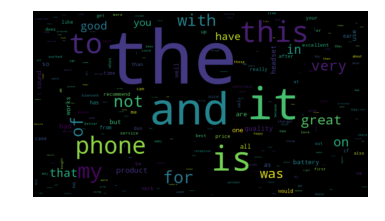

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 生成 generate_from_frequencies 可接受的形式：
d = {}
for k,v in term_frequencies_tuple:
    d[k] = int(v)
# print('d = ', d)

# Generate a word cloud image
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Exercise 5: 
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [40]:
# term_frequencies_tuple[1][0]
# len(term_frequencies_tuple)
list1_sorted = []
list2_sorted = []

def back_into_2_list(tuple):
    for i in range(0, len(tuple)):
        list1_sorted.append(tuple[i][0])
        list2_sorted.append(tuple[i][1])
#     print(list1_sorted, '\n\n\n', list2_sorted)

back_into_2_list(term_frequencies_tuple)
print('list1_sorted = ', list1_sorted)
print('\nlist2_sorted = ', list2_sorted)

list1_sorted =  ['100', '11', '12', '13', '15', '15g', '18', '2000', '2005', '2160', '24', '2mp', '325', '350', '375', '3o', '42', '44', '45', '4s', '5020', '5320', '680', '700w', '8125', '8525', '8530', 'abhor', 'abound', 'absolutel', 'ac', 'acceptable', 'accessable', 'accessing', 'accessory', 'accessoryone', 'accompanied', 'according', 'activate', 'activated', 'activesync', 'ad', 'adapter', 'adapters', 'add', 'addition', 'address', 'adhesive', 'against', 'aggravating', 'alarm', 'allot', 'allow', 'allowing', 'alot', 'aluminum', 'amazing', 'amp', 'ample', 'angeles', 'angle', 'ant', 'antena', 'anti', 'anyway', 'anywhere', 'apart', 'apartment', 'apparently', 'appealing', 'appearance', 'applifies', 'appointments', 'arguing', 'armband', 'arrival', 'asia', 'aspect', 'assumed', 'atleast', 'attacked', 'attractive', 'authentic', 'available', 'average', 'avoiding', 'awkward', 'awsome', 'backlight', 'balance', 'basement', 'basic', 'beat', 'beats', 'bed', 'beeping', 'behing', 'believe', 'bells', 

In [41]:
py.iplot(ta.plot_word_frequency([list1_sorted, list2_sorted], "Term Frequency Distribution"))

##### Transform the values in that vector into the log distribution:

In [68]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [73]:
term_frequencies_log.sort()

In [75]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

#### 6. Discretization and Binarization

In [76]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [77]:
mlb = preprocessing.LabelBinarizer()

In [78]:
mlb.fit(amazon.label_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [79]:
mlb.classes_

array(['negative', 'positive'], 
      dtype='<U8')

In [83]:
amazon['bin_category'] = mlb.transform(amazon['label_name']).tolist()

In [85]:
amazon[0:9]

,sentence,label,label_name,uni_grams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, Excellent, value]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, you, must, have, t...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, I, wasted, my, money]",[0]
